In [2]:
# set path

rootdir = '/Users/rj/'
import os,sys
# append the path where your scripts are
sys.path.append(rootdir+"soft/python/") 
# import your own packages
from universal import *
plot_conf()

workdir = rootdir + 'Fellow-CERN/SAD/ATF2/Energy/DR/'
os.chdir(workdir)
import random as rand

from matplotlib.ticker import AutoMinorLocator

In [5]:
# tune, emittance
dat0 = loadtxt('./data_march/emit_df_err.dat')
dE, emitx, emity, sigz, sigp, nx, ny, nz = transpose(dat0)

dat0 = loadtxt('./data_march/emit_df_err_ibs.dat')
dE_ibs, emitx_ibs, emity_ibs, sigz_ibs, sigp_ibs, nx_ibs, ny_ibs, nz_ibs = transpose(dat0)

# experiment data March, 2019
alphac = 2.14e-3;
freq0 = 714e6; # MHz

dat0 = loadtxt('./data_march/DR_emit_df.dat')
np_exp, dE_exp, err_dE_exp, sigx_exp, err_sigx_exp, sigy_exp, err_sigy_exp = transpose(dat0)

nux_exp = array([0.291130, 0.284670, 0.2888219, 0.293581, 0.299929])
nuy_exp = array([0.533322, 0.547726, 0.534665, 0.538571, 0.542721]) 

bx_exp = array([0.28939, 0.29491, 0.3023, 0.31656, 0.31569])
by_exp = array([2.34430, 2.46577, 2.74, 3.071, 3.086])

ax_exp = array([0.372, 0.373, 0.411, 0.429, 0.404])
ay_exp = array([-1.2, -1.278, -1.37, -1.32, -1.45])

dE_exp = sort(dE_exp)
df_exp = -alphac*freq0*dE_exp

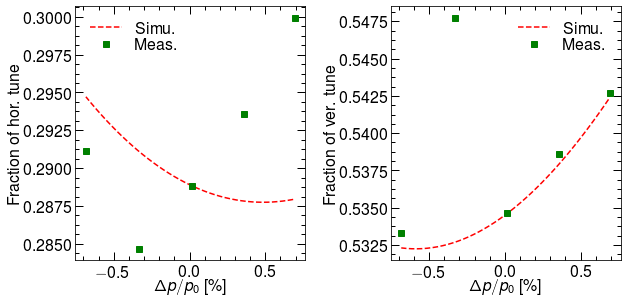

In [6]:
# Tune
# need measurement
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 4.5))
ax1.plot(dE*1e2, nx, '--', label='Simu.')
ax1.plot(dE_exp*1e2, nux_exp, 'gs', label='Meas.')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.set_ylabel(r'Fraction of hor. tune')
# plt.text(0.215, 0.638, r'$dE/E_0<0$')
ax1.legend(loc='best', frameon=False)

ax2.plot(dE*1e2, ny, '--', label='Simu.')
ax2.plot(dE_exp*1e2, nuy_exp, 'gs', label='Meas.')
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.set_ylabel(r'Fraction of ver. tune')
# plt.text(0.215, 0.638, r'$dE/E_0<0$')
ax2.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('./figure/tune_model_meas.pdf')

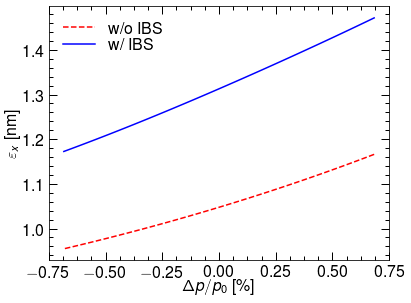

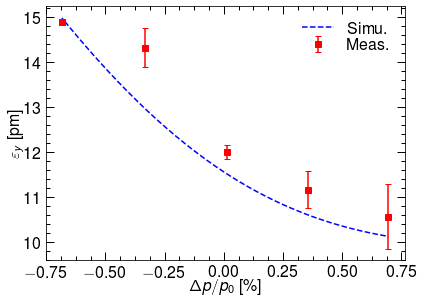

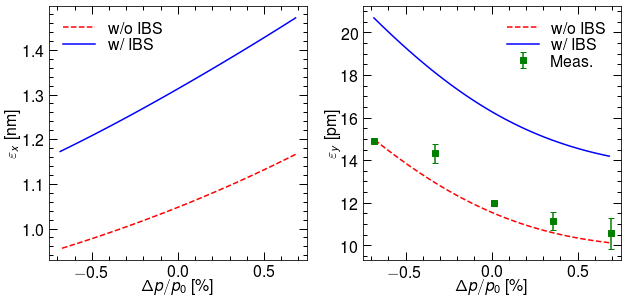

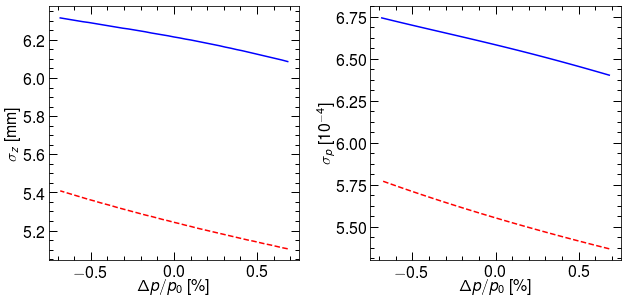

In [9]:
# emittance
# need measurement
fig = plt.figure()
plt.plot(dE*1e2, emitx*1e9, '--', label='w/o IBS')
plt.plot(dE_ibs*1e2, emitx_ibs*1e9, '-', label='w/ IBS')
plt.xlabel(r'$\Delta{p}/p_0$ [\%]')
plt.ylabel(r'$\varepsilon_x$ [nm]')
plt.xlim(-0.75, 0.75)
# plt.text(0.215, 0.638, r'$dE/E_0<0$')
plt.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('./figure/emitx_momentum_model.pdf')

fig = plt.figure()
#plt.plot(dE_ibs*1e2, emity_ibs*1e12, '-', label='w/ IBS')
plt.errorbar(dE_exp*1e2, sigy_exp**2/by_exp, yerr=sqrt(2)*err_sigy_exp*sigy_exp, fmt='s',  capsize=3, label='Meas.')
plt.plot(dE*1e2, emity*1e12, '--', label='Simu.')
plt.xlabel(r'$\Delta{p}/p_0$ [\%]')
plt.ylabel(r'$\varepsilon_y$ [pm]')
#plt.xlim(-0.75, 0.75)
# plt.text(0.215, 0.638, r'$dE/E_0<0$')
plt.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('./figure/emity_momentum_model_exp.pdf')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 4.5))
ax1.plot(dE*1e2, emitx*1e9, '--', label='w/o IBS')
ax1.plot(dE_ibs*1e2, emitx_ibs*1e9, '-', label='w/ IBS')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.set_ylabel(r'$\varepsilon_x$ [nm]')
ax1.set_xlim(-0.75, 0.75)
ax1.legend(loc='best', frameon=False)

ax2.plot(dE*1e2, emity*1e12, '--', label='w/o IBS')
ax2.plot(dE_ibs*1e2, emity_ibs*1e12, '-', label='w/ IBS')
ax2.errorbar(dE_exp*1e2, sigy_exp**2/by_exp, yerr=sqrt(2)*err_sigy_exp*sigy_exp, fmt='gs',  capsize=3, label='Meas.')
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.set_ylabel(r'$\varepsilon_y$ [pm]')
ax2.set_xlim(-0.75, 0.75)
# plt.text(0.215, 0.638, r'$dE/E_0<0$')
ax2.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('./figure/emitxy_momentum_model_exp.pdf')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 4.5))
ax1.plot(dE*1e2, sigz*1e3, '--', label='w/o IBS')
ax1.plot(dE_ibs*1e2, sigz_ibs*1e3, '-', label='w/o IBS')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.set_ylabel(r'$\sigma_z$ [mm]')

ax2.plot(dE*1e2, sigp*1e4, '--', label='w/o IBS')
ax2.plot(dE_ibs*1e2, sigp_ibs*1e4, '-', label='w/o IBS')
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.set_ylabel(r"$\sigma_p$ [10$^{-4}$]")

fig.tight_layout()
plt.show()

In [103]:
dat0 = loadtxt('./data/twiss_iex_err.dat')
dE_iex, bx_iex, ax_iex, by_iex, ay_iex, ex_iex, exp_iex, ey_iex, eyp_iex, dx_iex, dxp_iex, dy_iex, dyp_iex, sigx_iex, sigy_iex = transpose(dat0)

dat0 = loadtxt('./data/twiss_xsr_err.dat')
dE_xsr, bx_xsr, ax_xsr, by_xsr, ay_xsr, ex_xsr, exp_xsr, ey_xsr, eyp_xsr, dx_xsr, dxp_xsr, dy_xsr, dyp_xsr, sigx_xsr, sigy_xsr = transpose(dat0)

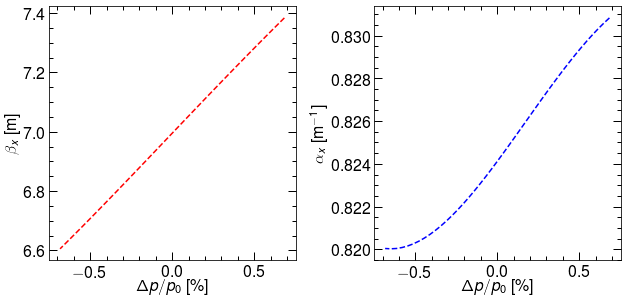

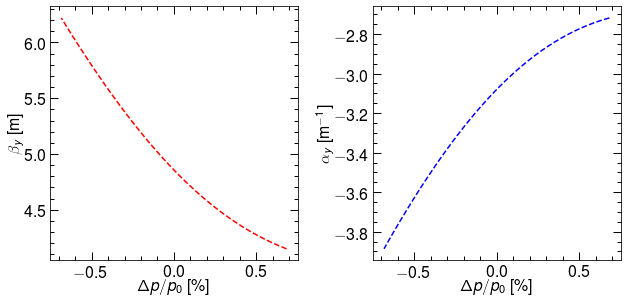

In [104]:
# Twiss parameters
# at IEX
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 4.5))
ax1.plot(dE_iex*1e2, bx_iex, '--',label='Simu.')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.set_ylabel(r'$\beta_x$ [m]')
# ax1.legend(loc='best', frameon=False)

# axs[1].plot(dE_iex*1e2, ax_iex)
ax2.plot(dE_iex*1e2, ax_iex, 'b--', label='Simu.')
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.set_ylabel(r'$\alpha_x$ [m$^{-1}$]')
# ax2.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('./figure/twiss_iex_model_hor.pdf')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5))
ax1.plot(dE_iex*1e2, by_iex, '--', label='Simu.')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.set_ylabel(r'$\beta_y$ [m]')
# ax1.legend(loc='best', frameon=False)

ax2.plot(dE_iex*1e2, ay_iex, 'b--', label='Simu.')
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.set_ylabel(r'$\alpha_y$ [m$^{-1}$]')
# ax2.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('./figure/twiss_iex_model_ver.pdf')

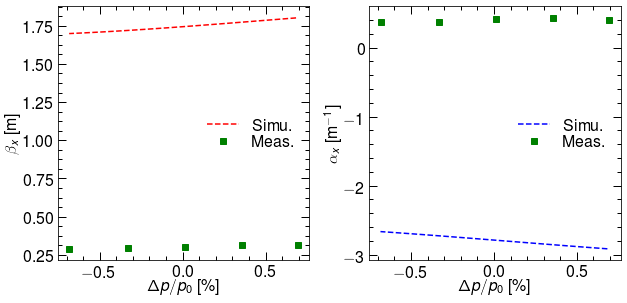

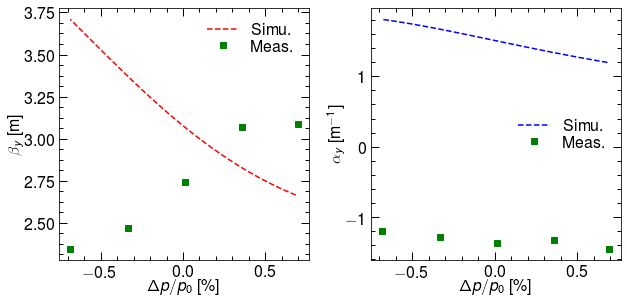

In [105]:
# Twiss parameters
# at XSR
# 
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 4.5))
ax1.plot(dE_iex*1e2, bx_xsr, '--',label='Simu.')
ax1.plot(dE_exp*1e2, bx_exp, 'gs',label='Meas.')
ax1.set_ylabel(r'$\beta_x$ [m]', fontdict=font)
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.legend(loc='best', frameon=False)

ax2.plot(dE_iex*1e2, ax_xsr, 'b--', label='Simu.')
ax2.plot(dE_exp*1e2, ax_exp, 'gs',label='Meas.')
ax2.set_ylabel(r'$\alpha_x$ [m$^{-1}$]')
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('./figure/twiss_xsr_model_hor.pdf')

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 4.5))
ax1.plot(dE_iex*1e2, by_xsr, '--', label='Simu.')
ax1.plot(dE_exp*1e2, by_exp, 'gs', label='Meas.')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]', fontdict=font)
ax1.set_ylabel(r'$\beta_y$ [m]', fontdict=font)
ax1.legend(loc='best', frameon=False)

ax2.plot(dE_iex*1e2, ay_xsr, 'b--', label='Simu.')
ax2.plot(dE_exp*1e2, ay_exp, 'gs',label='Meas.')
ax2.set_ylabel(r'$\alpha_y$ [m$^{-1}$]', fontdict=font)
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]', fontdict=font)
ax2.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('./figure/twiss_xsr_model_ver.pdf')

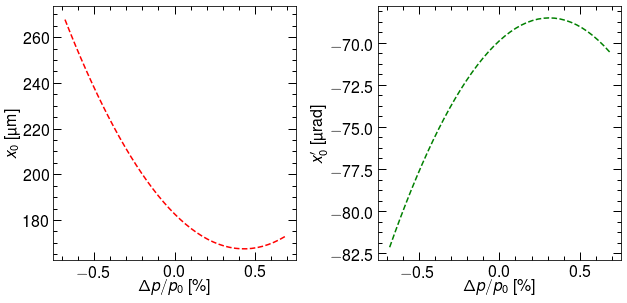

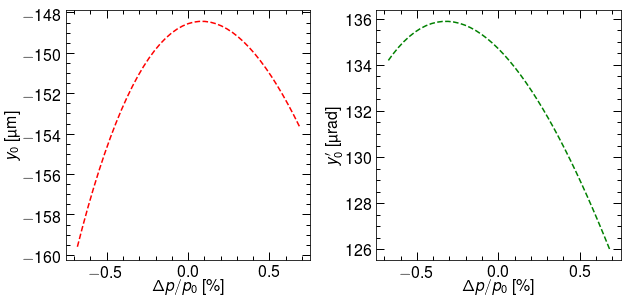

In [106]:
# COD, IEX
# dispersion IEX
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5))
ax1.plot(dE_iex*1e2, dx_iex*1e6, '--', label='model')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.set_ylabel(r'$x_0$ [\si{\um}]')
# ax2.legend(loc='best', frameon=False)

ax2.plot(dE_iex*1e2, dxp_iex*1e6, 'g--', label='model')
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.set_ylabel(r"$x'_0$ [\si{\micro}rad]")
# ax2.legend(loc='best', frameon=False)
fig.tight_layout()
plt.show()
fig.savefig('./figure/closedorbit_iex_model_hor.pdf')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4.5))
ax1.plot(dE_iex*1e2, dy_iex*1e6, '--', label='model')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.set_ylabel(r"$y_0$ [\si{\um}]")

ax2.plot(dE_iex*1e2, dyp_iex*1e6, 'g--', label='model')
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.set_ylabel(r"$y'_0$ [\si{\micro}rad]")

fig.tight_layout()
plt.show()
fig.savefig('./figure/closedorbit_iex_model_ver.pdf')

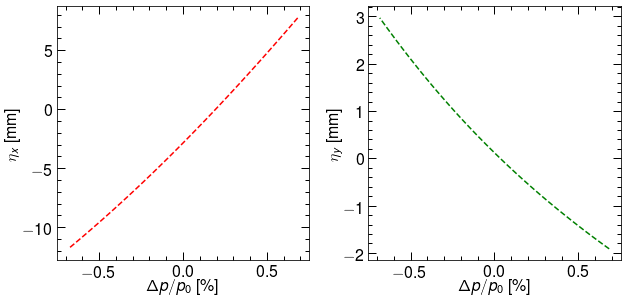

In [107]:
# dispersion IEX
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 4.5))
ax1.plot(dE_iex*1e2, ex_iex*1e3, '--', label='model')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.set_ylabel(r'$\eta_x$ [mm]')
# ax2.legend(loc='best', frameon=False)

ax2.plot(dE_iex*1e2, ey_iex*1e3, 'g--', label='model')
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.set_ylabel(r"$\eta_y$ [mm]")
# ax2.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
fig.savefig('./figure/Dispersion_IEX_model.pdf')

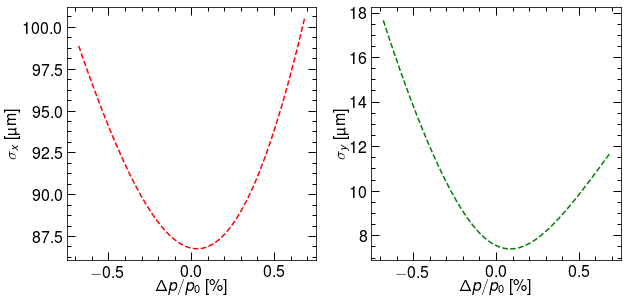

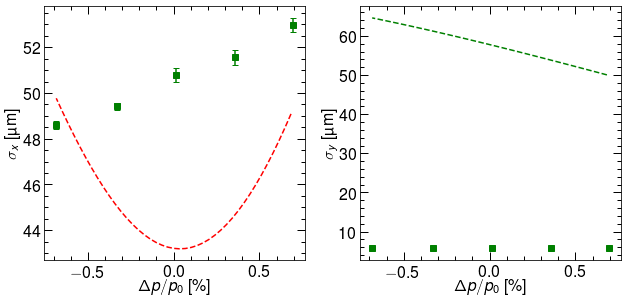

In [108]:
# beam size might be not necessary
# beam size at IEX
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 4.5))
ax1.plot(dE_iex*1e2, sigx_iex*1e6, '--', label='model')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.set_ylabel(r'$\sigma_x$ [\si{\um}]')

ax2.plot(dE_iex*1e2, sigy_iex*1e6, 'g--', label='model')
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.set_ylabel(r"$\sigma_y$ [\si{\um}]")

fig.tight_layout()
plt.show()
fig.savefig('./figure/SIGXY_IEX_model.pdf')

# beam size at XSR
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(9, 4.5))
ax1.plot(dE_iex*1e2, sigx_xsr*1e6, '--', label='Simu.')
ax1.errorbar(dE_exp*1e2, sigx_exp, err_sigx_exp, fmt='gs', capsize=3, label='Meas.')
ax1.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax1.set_ylabel(r'$\sigma_x$ [\si{\um}]')

ax2.plot(dE_iex*1e2, sigy_xsr*1e6, 'g--', label='Simu.')
ax2.errorbar(dE_exp*1e2, sigy_exp, err_sigy_exp, fmt='gs', capsize=3, label='Meas.')
ax2.set_xlabel(r'$\Delta{p}/p_0$ [\%]')
ax2.set_ylabel(r"$\sigma_y$ [\si{\um}]")

fig.tight_layout()
plt.show()

In [109]:
# closed orbit
dat0 = loadtxt('data/closedorb_err_0kHz.dat', usecols=[0, 1, 3])
s0, x0_0, y0_0 = transpose(dat0)

dat0 = loadtxt('data/closedorb_err_+5kHz.dat', usecols=[0, 1, 3])
s0, x0_5, y0_5 = transpose(dat0)

dat0 = loadtxt('data/closedorb_err_-5kHz.dat', usecols=[0, 1, 3])
s0, x0_m5, y0_m5 = transpose(dat0)

# experiment data in March 2019
# -5 kHz
dat0 = loadtxt('data/bpm19mar05_072525_decode.dat')
x0_m5_exp, y0_m5_exp = transpose(dat0)
# 0 kHz
dat0 = loadtxt('data/bpm19mar05_080029_decode.dat')
x0_exp, y0_exp = transpose(dat0)
# +5 kH
dat0 = loadtxt('data/bpm19mar05_081657_decode.dat')
x0_5_exp, y0_5_exp = transpose(dat0)


In [110]:
s_bpm = array([     .2463,     .7573,    2.6663,    3.1773,    5.0863,    5.5973,    7.5063,    8.0173,    9.9263,
    10.4373,   12.3463,   12.8573,   14.7663,   15.2773,   17.1863,   17.6973,   19.2723,   19.8773,
    21.4223,   25.0843,   28.5743,   32.2993,   32.9193,   35.5693,   38.5593,   40.8993,   43.5993,
    45.2492,   45.9492,   46.9492,   48.4972,   50.2062,   50.6772,   52.5862,   53.0972,   55.0062,
    55.5172,   57.4262,   57.9372,   59.8462,   60.3572,   62.2662,   62.7772,   64.6862,   65.1972,
    67.1062,   67.6172,   69.5262,   70.0372,   71.9462,   72.4572,   74.3662,   74.8772,   76.7862,
    77.2972,   79.2062,   79.7172,   81.6262,   82.1372,   84.0462,   84.5572,   86.4662,   86.9772,
    88.5522,   89.1572,   90.7022,   93.0117,   94.6992,   97.8792,   99.5667,  101.5792,  102.1992,
   104.8492,  107.8392,  110.1792,  112.8792,  114.5291,  115.2291,  116.2291,  117.7771,  119.4861,
   119.9571,  121.8661,  122.3771,  124.2861,  124.7971,  126.7061,  127.2171,  129.1261,  129.6371,
   131.5461,  132.0571,  133.9661,  134.4771,  136.3861,  136.8971])

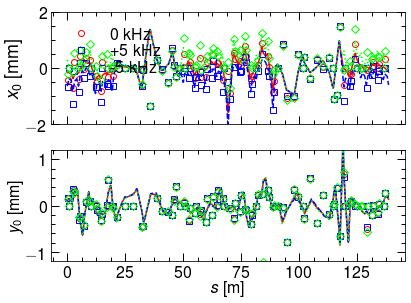

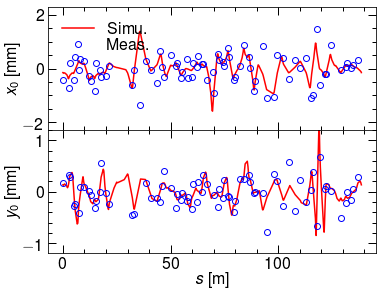

In [114]:
# closed orb, +/-5 kHz
fig, axs = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(hspace=0)
axs[0].plot(s0, x0_0*1e3)
axs[0].plot(s_bpm, x0_exp[0:len(s_bpm)]*1e-3, 'ro', mfc='None', label='0 kHz')
axs[0].plot(s0, x0_5*1e3)
axs[0].plot(s_bpm, x0_5_exp[0:len(s_bpm)]*1e-3, 'bs', mfc='None', label='+5 kHz')
axs[0].plot(s0, x0_m5*1e3, ':')
axs[0].plot(s_bpm, x0_m5_exp[0:len(s_bpm)]*1e-3, 'gD', color='lime', mfc='None', label='-5 kHz')
# axs[0].set_xlabel(r'$s$ [m]', fontsize=18)    
axs[0].set_ylabel(r'$x_0$ [mm]', fontsize=18)
axs[0].set_ylim(-2, 2)
axs[0].legend(loc='best', frameon=False)

axs[1].plot(s0, y0_0*1e3, label=' 0 kHz')
axs[1].plot(s_bpm, y0_exp[0:len(s_bpm)]*1e-3, 'ro', mfc='None', label='0 kHz/exp')
axs[1].plot(s0, y0_5*1e3, label='+5 kHz')
axs[1].plot(s_bpm, y0_5_exp[0:len(s_bpm)]*1e-3, 'bs', mfc='None', label='+5 kHz/exp')
axs[1].plot(s0, y0_m5*1e3, ':',label='-5 kHz')
axs[1].plot(s_bpm, y0_m5_exp[0:len(s_bpm)]*1e-3, 'gD', color='lime', mfc='None', label='-5 kHz/exp')
axs[1].set_xlabel(r'$s$ [m]')
axs[1].set_ylabel(r'$y_0$ [mm]')
axs[1].set_ylim(-1.2, 1.2)
# axs[1].legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(hspace=0)
axs[0].plot(s0, x0_0*1e3, label='Simu.')
for i in range(len(s_bpm)):
    if x0_exp[i]!=0:
        if i==0:
            axs[0].plot(s_bpm[i], x0_exp[i]*1e-3, 'bo', mfc='None', label='Meas.')    
        else:
            axs[0].plot(s_bpm[i], x0_exp[i]*1e-3, 'bo', mfc='None')
axs[0].set_ylabel(r'$x_0$ [mm]')
axs[0].set_ylim(-2.3, 2.3)
axs[0].legend(loc='best', frameon=False)

axs[1].plot(s0, y0_0*1e3, label='Simu.')
for i in range(len(s_bpm)):
    if y0_exp[i]!=0:
        if i==0:
            axs[1].plot(s_bpm[i], y0_exp[i]*1e-3, 'bo', mfc='None', label='Meas.')    
        else:
            axs[1].plot(s_bpm[i], y0_exp[i]*1e-3, 'bo', mfc='None')
axs[1].set_xlabel(r'$s$ [m]')
axs[1].set_ylabel(r'$y_0$ [mm]')
axs[1].set_ylim(-1.2, 1.2)
#axs[1].legend(loc='best', frameon=False)

# fig.tight_layout()
plt.show()
fig.savefig('./figure/closedorbit_ring_model_exp.pdf',bbox_inches='tight')

In [34]:
# dispersion
dat0 = loadtxt('data/dispersion_err_0kHz.dat')
s0, ex_0, epx_0, ey_0, epy_0 = transpose(dat0)

dat0 = loadtxt('data/dispersion_err_+5kHz.dat')
s0, ex_5, epx_5, ey_5, epy_5 = transpose(dat0)

dat0 = loadtxt('data/dispersion_err_-5kHz.dat')
s0, ex_m5, epx_m5, ey_m5, epy_m5 = transpose(dat0)

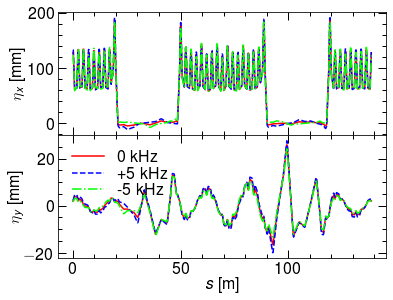

In [112]:
# closed orb, +/-5 kHz
fig, axs = plt.subplots(2, 1, sharex = True)
fig.subplots_adjust(hspace=0)
axs[0].plot(s0, ex_0*1e3, label=' 0 kHz')
axs[0].plot(s0, ex_5*1e3, label='+5 kHz')
axs[0].plot(s0, ex_m5*1e3, label='-5 kHz')
axs[0].set_ylabel(r'$\eta_x$ [mm]')
# axs[0].legend(loc='best', frameon=False)

axs[1].plot(s0, ey_0*1e3, label=' 0 kHz')
axs[1].plot(s0, ey_5*1e3, label='+5 kHz')
axs[1].plot(s0, ey_m5*1e3, label='-5 kHz')
axs[1].set_xlabel(r'$s$ [m]')
axs[1].set_ylabel(r'$\eta_y$ [mm]')
axs[1].legend(loc='upper left', frameon=False)

# fig.tight_layout()
plt.show()
fig.savefig('./figure/dispersion_ring_model.pdf',bbox_inches='tight')

In [148]:
# H function
dat0 = loadtxt('data/DispersionInv_err_0kHz.dat')
s0, hx_0, hy_0 = transpose(dat0)

dat0 = loadtxt('data/DispersionInv_err_+5kHz.dat')
s0, hx_5, hy_5 = transpose(dat0)

dat0 = loadtxt('data/DispersionInv_err_-5kHz.dat')
s0, hx_m5, hy_m5 = transpose(dat0)

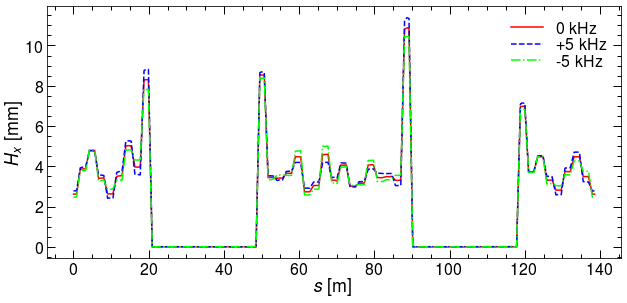

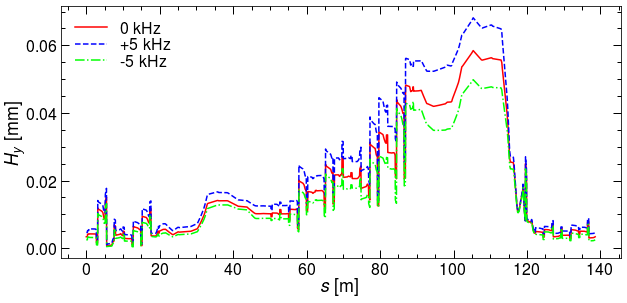

In [150]:
# H function, +/-5 kHz
fig = plt.figure(figsize=(9, 4.5))
plt.plot(s0, hx_0*1e3, label=' 0 kHz')
plt.plot(s0, hx_5*1e3, label='+5 kHz')
plt.plot(s0, hx_m5*1e3, label='-5 kHz')
plt.xlabel(r'$s$ [m]', fontsize=18)    
plt.ylabel(r'$H_x$ [mm]', fontsize=18)
plt.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()

fig = plt.figure(figsize=(9, 4.5))
plt.plot(s0, hy_0*1e3, label=' 0 kHz')
plt.plot(s0, hy_5*1e3, label='+5 kHz')
plt.plot(s0, hy_m5*1e3, label='-5 kHz')
plt.xlabel(r'$s$ [m]', fontsize=18)
plt.ylabel(r'$H_y$ [mm]', fontsize=18)
plt.legend(loc='best', frameon=False)

fig.tight_layout()
plt.show()
# conclusion from Hx, Hy is that the vertical emittance decrease vs. beam energy

In [2]:
alphac = 2.14e-3;
freq0 = 714e6; # MHz
freq2p= -1/freq0/alphac;
freq2p*2e3

-0.0013089347888688185

In [4]:
2e3/alphac/freq0

0.0013089347888688187

In [76]:
0.007*2.14e-3*714e6

10695.720000000001